# Demo of Transdiff-L 1StepAR

In [ ]:
import torch
from models.transdiff import transdiff_huge, transdiff_large, transdiff_base
from models.vae import AutoencoderKL

In [ ]:
model = transdiff_large(buffer_size=64, diffloss_w=1024, num_sampling_steps=str(100))
state_dict = torch.load("ckpt/transdiff_l.pth")
model.load_state_dict(state_dict["model_ema"], strict=False)
model = model.to('cuda:0').eval()
vae = AutoencoderKL(embed_dim=16, ch_mult=(1, 1, 2, 2, 4), ckpt_path="ckpt/vae/kl16.ckpt").to('cuda:0').eval()
for name, param in model.named_parameters():
    param.requires_grad = False
for name, param in vae.named_parameters():
    param.requires_grad = False

/tmp/ipykernel_1599828/730778020.py:11: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():


3.0458526611328125
(88, 207, 360, 388, 113, 355, 980, 323, 979)


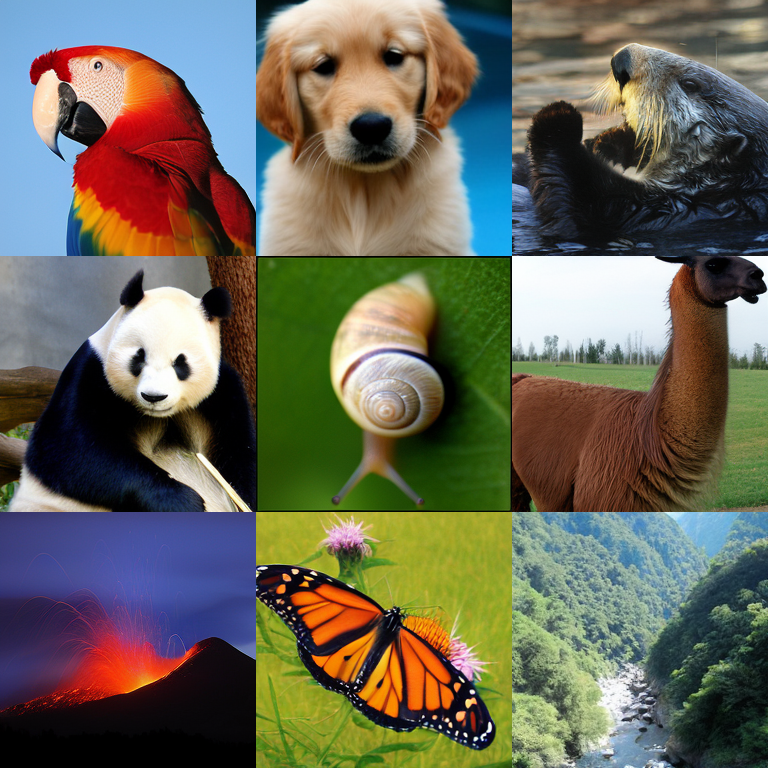

In [3]:
from torchvision.transforms.functional import to_pil_image
import time
seed = 42
torch.manual_seed(seed)

cfg_scale = 4.0
class_labels = 88, 207, 360, 388, 113, 355, 980, 323, 979, 
start = time.time()
with torch.no_grad(), torch.cuda.amp.autocast():
    res_dict = model.samples(
      num_sampling_steps=100, cfg=cfg_scale, 
      labels=torch.Tensor(class_labels).long().cuda(),
      sampler='maruyama', scale_0=0.95, scale_1=0.95) # maruyama
    sampled_images = vae.decode(res_dict / 0.2325).clip(-1, 1)
print(time.time()-start)
tmp = torch.concat([torch.concat([sampled_images[j] for j in range(i, i+3)], dim=2) for i in range(0, 9, 3)], dim=1)
print(class_labels)
to_pil_image(((tmp+1.0)*127.5).to(torch.uint8))

# Demo of Transdiff-L MRAR

In [4]:
import torch
from models.transdiff_mrar import transdiff_huge, transdiff_large, transdiff_base
from models.vae import AutoencoderKL

In [ ]:
model = transdiff_large(buffer_size=64, diffloss_w=1024, num_sampling_steps=str(100))
state_dict = torch.load("ckpt/transdiff_l_mrar.pth")
model.load_state_dict(state_dict["model"], strict=False)
model = model.to('cuda:0').eval()
vae = AutoencoderKL(embed_dim=16, ch_mult=(1, 1, 2, 2, 4), ckpt_path="ckpt/vae/kl16.ckpt").to('cuda:0').eval()
for name, param in model.named_parameters():
    param.requires_grad = False
for name, param in vae.named_parameters():
    param.requires_grad = False

(88, 207, 360, 388, 113, 355, 980, 323, 979)


/tmp/ipykernel_1599828/2449132892.py:12: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():


10.46573543548584


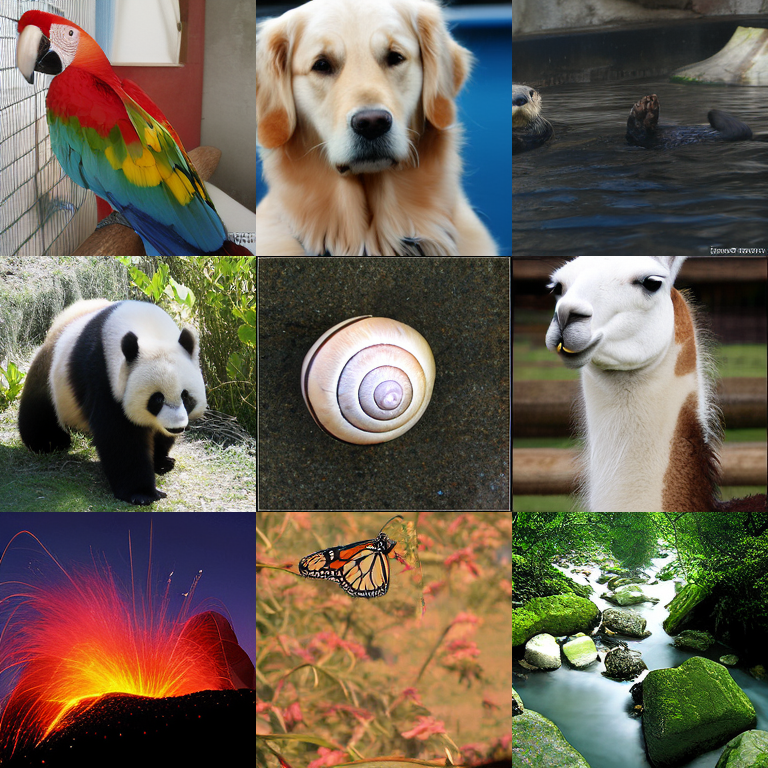

In [6]:
from torchvision.transforms.functional import to_pil_image
import time
seed = 42
torch.manual_seed(seed)

cfg_scale = 4.0
class_labels = 88, 207, 360, 388, 113, 355, 980, 323, 979, 
print(class_labels)
start = time.time()
with torch.no_grad(), torch.cuda.amp.autocast():
    res_dict = model.samples(
      num_sampling_steps=100, cfg=cfg_scale, 
      labels=torch.Tensor(class_labels).long().cuda(),
      sampler='maruyama', scale_0=0.95, scale_1=0.95) # maruyama
    sampled_images = vae.decode(res_dict / 0.2325).clip(-1, 1)
print(time.time()-start)
tmp2 = torch.concat([torch.concat([sampled_images[j] for j in range(i, i+3)], dim=2) for i in range(0, 9, 3)], dim=1)
to_pil_image(((tmp2+1.0)*127.5).to(torch.uint8))

# Demo of Transdiff-L 1StepAR 512x512

In [8]:
import torch
from models.transdiff import transdiff_huge, transdiff_large, transdiff_base
from models.vae import AutoencoderKL

In [ ]:
model = transdiff_large(img_size=512, buffer_size=64, diffloss_w=1024, num_sampling_steps=str(100))
state_dict = torch.load("ckpt/transdiff_l_512.pth")
model.load_state_dict(state_dict["model_ema"], strict=False)
model = model.to('cuda:0').eval()
vae = AutoencoderKL(embed_dim=16, ch_mult=(1, 1, 2, 2, 4), ckpt_path="ckpt/vae/kl16.ckpt").to('cuda:0').eval()
for name, param in model.named_parameters():
    param.requires_grad = False
for name, param in vae.named_parameters():
    param.requires_grad = False

/tmp/ipykernel_1599828/730778020.py:11: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():


8.426347255706787
(88, 207, 360, 388, 113, 355, 980, 323, 979)


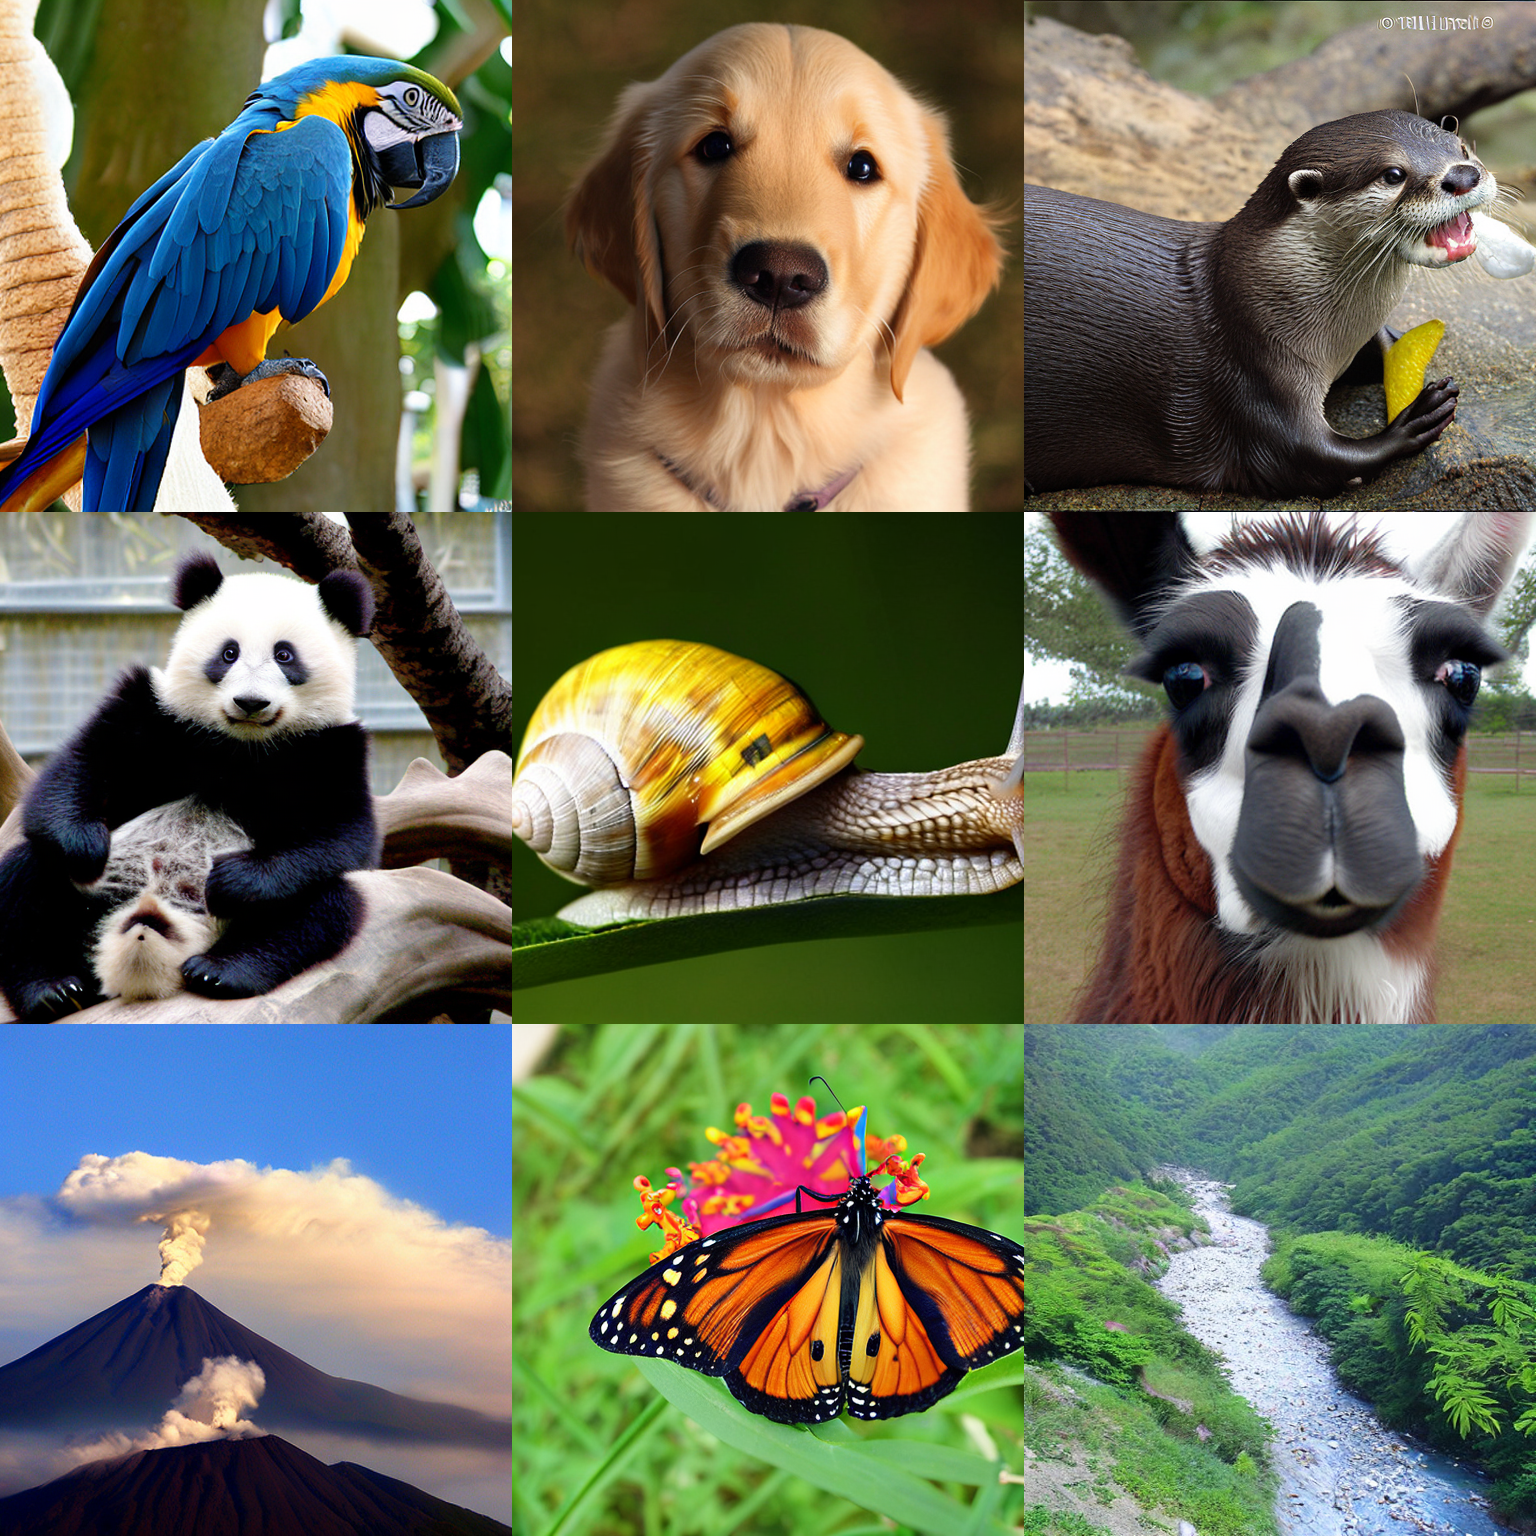

In [10]:
import random
from torchvision.transforms.functional import to_pil_image
import time
import random
seed = 42
torch.manual_seed(seed)

cfg_scale = 4.0
class_labels = 88, 207, 360, 388, 113, 355, 980, 323, 979, 
start = time.time()
with torch.no_grad(), torch.cuda.amp.autocast():
    res_dict = model.samples(
      num_sampling_steps=100, cfg=cfg_scale, 
      labels=torch.Tensor(class_labels).long().cuda(),
      sampler='maruyama', scale_0=0.95, scale_1=0.95) # maruyama
    sampled_images = vae.decode(res_dict / 0.2325).clip(-1, 1)
print(time.time()-start)
tmp = torch.concat([torch.concat([sampled_images[j] for j in range(i, i+3)], dim=2) for i in range(0, 9, 3)], dim=1)
print(class_labels)
to_pil_image(((tmp+1.0)*127.5).to(torch.uint8))